# **Exploring Helicopter Prison Breaks**

# **Table of Content:**

## Introduction 
- Data Collection and Preparation
  - 1. Data Collection, Challenges and Limitations
  - 2. Preparing Data for Analysis: Python Implementation
    - 2.1 Python Libraries
    - 2.2 Extract Data and convert it into Pandas DataFrame
    - 2.3 Removing Redundant Columns

- [A. Temporal Analysis:](#Temporal-Analysis)
   - How many prison escapes occurred each year? Are there any notable trends or patterns over time?
   - Are there specific months or days of the week when prison escapes are more likely to happen?
   
- [B. Geographical Analysis:](#Geographical-Analysis)
   - Which countries have the highest number of recorded prison escapes?

- [C. Success Analysis:](#Success-Analysis)
   - What is the overall success rate of prison escapes in the dataset?
   
- [D. Escapee Analysis:](#Escapee-Analysis)
   - What is the average number of escapees per incident?
   - Who are the hardened escapee inmates?


# Exploring Prison Escapes: An Explanatory Analysis

## Introduction:
Prison escapes have long captivated public interest, showcasing human determination and the vulnerabilities of correctional systems. This analysis delves into an exploratory analysis of a dataset on prison escapes, aiming to uncover insights into the temporal, geographical, success-related, prison-specific, escapee-related, and time-related factors associated with these incidents.

**Temporal Analysis:**
Analyzing the dataset reveals a valuable historical perspective on prison escapes. By examining the number of escapes per year, we can identify trends and patterns. Are there particular years when escapes spiked? Is there a consistent increase or decrease over time? Furthermore, analyzing monthly and weekly patterns may shed light on whether certain periods are more conducive to escape attempts.

**Geographical Analysis:**
Understanding the geographical distribution of prison escapes can provide insights into the global landscape of these incidents. By examining the countries with the highest number of recorded escapes, we can identify regions where prisons face significant challenges in maintaining security. 

**Success Analysis:**
Determining the success rate of prison escapes allows us to evaluate the efficacy of security measures and identify potential areas for improvement.


**Escapee Analysis:**
Analyzing the average number of escapees per incident can reveal trends in group dynamics or individual motivations. 

**Conclusion:**
Through an in-depth exploratory analysis of the dataset on prison escapes, we have gained valuable insights into various aspects of these incidents. The temporal analysis allows us to identify trends and patterns over time, while the geographical analysis helps us understand the global distribution of prison escapes. By examining success rates, we can enhance our understanding of successful or unsuccessful escape attempts.

The findings of this analysis provide a foundation for further research and can assist authorities in developing targeted strategies to prevent prison escapes. By addressing vulnerabilities, improving security measures, and implementing comprehensive post-escape protocols, the aim is to minimize the occurrence of prison escapes and safeguard public safety.

**Note:** I will focus on analyzing data related to helicopter prison breaks. I will be obtaining the data from [Wikipedia](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes), which is a comprehensive source of information on this topic. It's important to note that the data may be subject to updates, and as such, my findings may differ from future analyses.

## Data Collection and Preparation

The dataset used for this analysis was obtained from the "List of helicopter prison escapes" page on [Wikipedia](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes). The data is in tabular form, consisting of 48 rows and 6 columns. All columns are in the object data type, except for the 'Escapee(s)' column which contains missing values.

It is important to acknowledge that there are potential challenges and limitations associated with the data. The data may suffer from biases and underreporting, particularly in countries with restricted media or limited access to information. The accuracy and completeness of the data may also be influenced by the reliability of the sources used. Mistakes in reporting or categorization could impact the analysis. Therefore, it is crucial to consider these factors when interpreting the results.

### 2. Preparing Data for Analysis: Python Implementation

#### 2.1 Python Libraries:

To facilitate data manipulation, visualization, and analysis, we will utilize several essential Python libraries. The following libraries will play a crucial role in our analysis:

- `requests`: This library allows us to make HTTP requests and download data from the Wikipedia page.
- `BeautifulSoup`: By using BeautifulSoup, we can parse the HTML code of the Wikipedia page and extract relevant data.
- `datetime`: The datetime module assists us in working with dates in the dataset.
- `pandas`: This widely-used library offers powerful data structures and efficient handling and processing of complex datasets, enabling data manipulation, analysis, and cleaning.
- `matplotlib`: We will utilize the matplotlib library for creating visualizations such as charts and graphs to aid in data understanding.
- `matplotlib.pyplot`: The pyplot sublibrary of matplotlib provides an easy-to-use interface for creating charts and graphs.
- `%matplotlib inline`: This magic command ensures that the plots are displayed within the Jupyter Notebook itself.
- `defaultdict`: This subclass of the built-in dictionary in Python helps efficiently count occurrences of specific values in our data.
- `re`: The re module provides support for regular expressions, which will be useful for parsing certain data in the dataset.
- `unicodedata`: The unicodedata module enables character normalization within our dataset.
- `numpy`: Widely used for numerical computing, data manipulation, and analysis, numpy will facilitate various statistical calculations on our dataset.

Employing these libraries will enable us to effectively clean, manipulate, and analyze the data in our dataset. Let's proceed with the implementation!

In [17]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.colors as mcolors
%matplotlib inline
from collections import defaultdict
import re
import pandas as pd
import unicodedata
import numpy as np

#### 2.2 Extract Data and Convert it into a Pandas DataFrame:

Once I had imported the necessary libraries for our analysis, the next step is to extract the data from the source and convert it into a Pandas DataFrame. This will enable me to efficiently manipulate and analyze the data.

To create the DataFrame, I can utilize the pd.DataFrame() function and pass the extracted data along with the header row as arguments. This process assigns appropriate headers to the DataFrame's columns, facilitating ease of use and analysis.

Before creating the DataFrame, it is beneficial to examine the structure and content of the extracted data. By printing the first two rows of the data and the header row, we can obtain an initial understanding of the dataset. This insight into the data aids in assessing its format and characteristics.

In [18]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"

# Set a custom User-Agent to avoid being blocked by Wikipedia
headers = {
    "User-Agent": "Mozilla/5.0 (compatible; PrisonEscapeBot/1.0; +https://github.com/Chukwuebuka-2003)"
}

# Download the web page data
response = requests.get(url, headers=headers)
if response.status_code != 200:
    raise Exception(f"Failed to fetch page: {response.status_code} - {response.reason}")

html = response.content

# Parse the HTML code using BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Find all table elements on the page
tables = soup.find_all("table")

# Loop through each table and find the one with the desired header row
desired_table = None
header_row = None
rows = None

for table in tables:
    rows = table.find_all("tr")
    header_row = [cell.text.strip() for cell in rows[0].find_all("th")]
    if "Date" in header_row and "Prison name" in header_row:
        desired_table = table
        break

# Extract the data rows
data = []
for row in rows[2:]:
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

# Print the header row and first 3 rows of data
print("Header:")
print(header_row, "\n")
print("First 2 rows of Data:")
for row in data[:2]:
    print(row)

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data, columns=header_row)
#save to a csv file
df.to_csv('prison.csv')

Header:
['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Details'] 

First 2 rows of Data:
['October 31, 1973', 'Mountjoy Jail, Dublin', 'Ireland', 'Yes', "JB O'HaganSeamus TwomeyKevin Mallon", 'An IRA member hijacked a helicopter and forced the pilot to land in the exercise yard of the prison\'s D Wing at 3:40\xa0p.m. Three prisoners who were also members of the IRA escaped aboard the helicopter. Another prisoner was quoted as saying, "One shamefaced screw apologised to the governor and said he thought it was the new Minister for Defence (Paddy Donegan) arriving. I told him it was our Minister of Defence leaving."\nThe escape became Republican lore and was immortalized by "The Helicopter Song", which contains the lines "It\'s up like a bird and over the city. There\'s three men a\'missing I heard the warder say".[1]']
['May 24, 1978', 'United States Penitentiary, Marion, Illinois', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson',

#### 2.3 Removing Redundant/Irrelevant  Columns:

In order to streamline the analysis and concentrate on pertinent features, I made the decision to remove the 'details' column from the dataset. This column was deemed redundant as it contained repetitive information that could potentially introduce noise and complicate the analysis process.

By eliminating this column, I aim to enhance the accuracy and simplicity of our analysis. This will enable me to derive more focused and directly applicable insights that align with the goals of this project. Removing this columns helps in reducing unnecessary complexity and allows me to concentrate on the most relevant aspects of the dataset.

In [19]:
# Remove the "Details" column
df = df.drop("Details", axis=1)

# To enhance readability, set the maximum column width to 30 characters.
pd.set_option('display.max_colwidth', 30)

print(df[:3])

                Date                    Prison name        Country Succeeded  \
0   October 31, 1973          Mountjoy Jail, Dublin        Ireland       Yes   
1       May 24, 1978  United States Penitentiary...  United States        No   
2  February 27, 1981  Fleury-Mérogis, Essonne, I...         France       Yes   

                      Escapee(s)  
0  JB O'HaganSeamus TwomeyKev...  
1  Garrett Brock TrapnellMart...  
2    Gérard DupréDaniel Beaumont  


## Temporal Analysis

### 1. How many prison escapes occurred each year? Are there any notable trends or patterns over time?

In [20]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year and count the number of escapes in each year
escapes_per_year = df.groupby('Year').size()

# Print the number of prison escapes per year
print("Prison Escapes per Year:")
print(escapes_per_year)

Prison Escapes per Year:
Year
1973.0    1
1978.0    1
1981.0    2
1985.0    2
1986.0    3
1987.0    1
1988.0    3
1989.0    2
1990.0    1
1991.0    1
1992.0    1
1993.0    1
1996.0    1
1997.0    1
1999.0    1
2000.0    2
2001.0    3
2002.0    2
2003.0    1
2005.0    1
2006.0    1
2007.0    3
2009.0    3
2010.0    1
2012.0    1
2013.0    2
2014.0    1
2016.0    1
2018.0    1
2020.0    1
dtype: int64


<Axes: title={'center': 'Prison Escapes per Year'}, xlabel='Year', ylabel='Number of Escapes'>

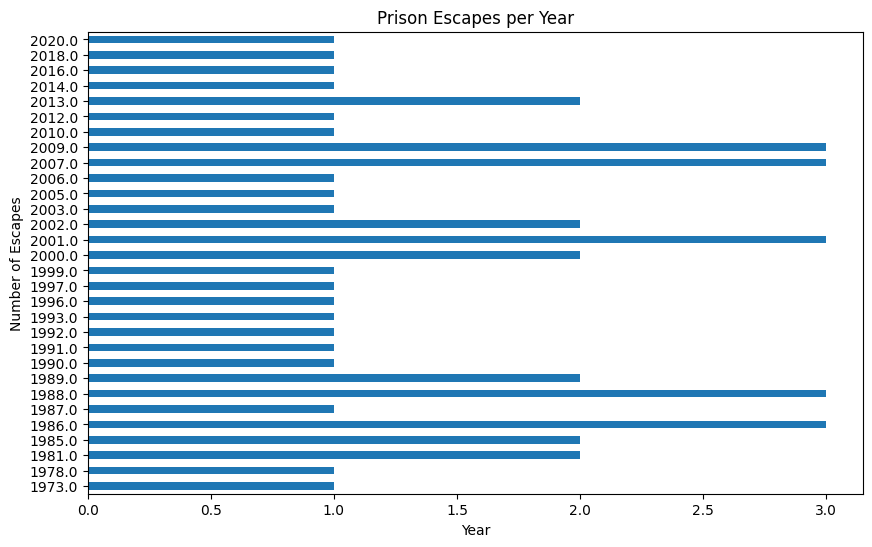

In [21]:
# Plotting the number of prison escapes per year
escapes_per_year.plot(kind='barh', figsize=(10, 6), xlabel='Year', ylabel='Number of Escapes', title='Prison Escapes per Year')

**Observation:** The years in with the highest prison escapes occurrence are: 1986, 2001, 2007, 2009.

### 2. Are there specific months or days of the week when prison escapes are more likely to happen?

In [22]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and day of the week from the 'Date' column
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Create a dictionary to map month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Group the data by month and count the number of escapes in each month
escapes_per_month = df.groupby('Month').size()

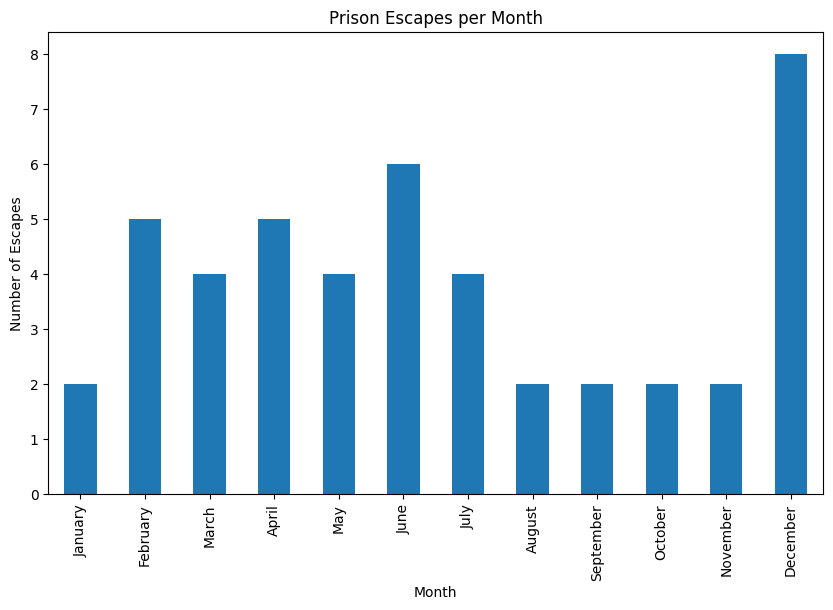

In [23]:
# Plot the number of prison escapes per month
escapes_per_month = escapes_per_month.rename(index=month_names)  # Rename month numbers to month names
escapes_per_month.plot(kind='bar', figsize=(10, 6), xlabel='Month', ylabel='Number of Escapes',
                       title='Prison Escapes per Month')


# Create a list to map day of the week numbers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by day of the week and count the number of escapes on each day
escapes_per_day = df.groupby('DayOfWeek').size()

# Show the plots
plt.show()

<Axes: title={'center': 'Prison Escapes per Day of the Week'}, xlabel='Day of the Week', ylabel='Number of Escapes'>

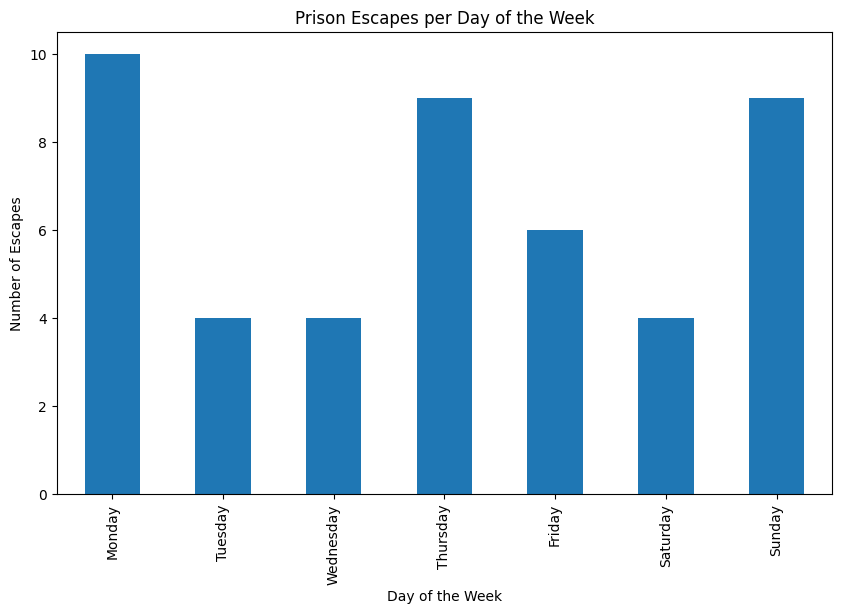

In [24]:
# Plot the number of prison escapes per day of the week
escapes_per_day.index = day_names  # Rename day of the week numbers to day names
escapes_per_day.plot(kind='bar', figsize=(10, 6), xlabel='Day of the Week', ylabel='Number of Escapes',
                     title='Prison Escapes per Day of the Week')

**Observation**: December ranked higher when analyzing prison escapes per month. Monday and Thursday ranked higher in prison escapes per Day of the week 

## Geographical Analysis

### 1. Which countries have the highest number of recorded prison escapes?

In [25]:
# Group the data by country and count the number of escapes in each country
escapes_per_country = df.groupby('Country').size()

# Sort the countries based on the number of escapes in descending order
top_countries = escapes_per_country.sort_values(ascending=False)

# Print the top countries with the highest number of recorded prison escapes
print("Countries with the Highest Number of Recorded Prison Escapes:")
print(top_countries.head(10))


Countries with the Highest Number of Recorded Prison Escapes:
Country
France            15
United States      8
Canada             4
Greece             4
Belgium            4
Brazil             2
Australia          2
United Kingdom     2
Colombia           2
Chile              1
dtype: int64


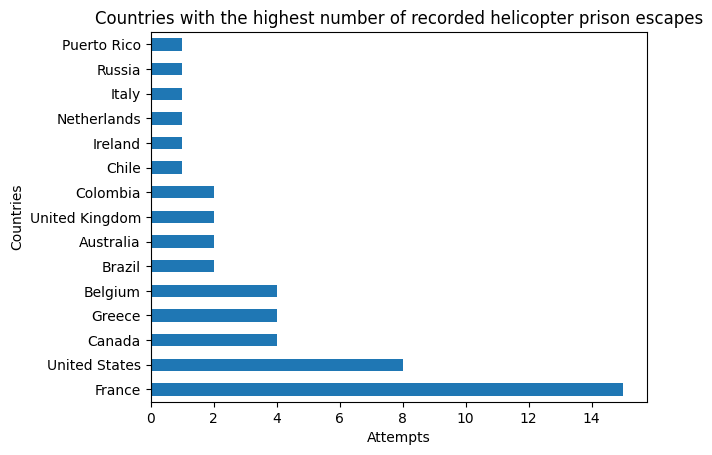

In [26]:
top_countries.plot(kind='barh')
plt.title('Countries with the highest number of recorded helicopter prison escapes')
plt.xlabel('Attempts')
plt.ylabel('Countries')
plt.show()

**Observation:** France has the highest recorded prison escapes

## Success Analysis

### 1. What is the overall success rate of prison escapes in the dataset?

In [27]:
# Create a frequency table with the 'Succeeded' column
success_rate = df['Succeeded'].value_counts()['Yes']
failure_rate = df['Succeeded'].value_counts()['No']

total_rate = success_rate + failure_rate

success_percentage = success_rate * total_rate / 100
failure_percentage = failure_rate * total_rate / 100

print(f"Total: {total_rate}\nSuccess: {success_rate}\nFailure: {failure_rate} ")

Total: 49
Success: 35
Failure: 14 


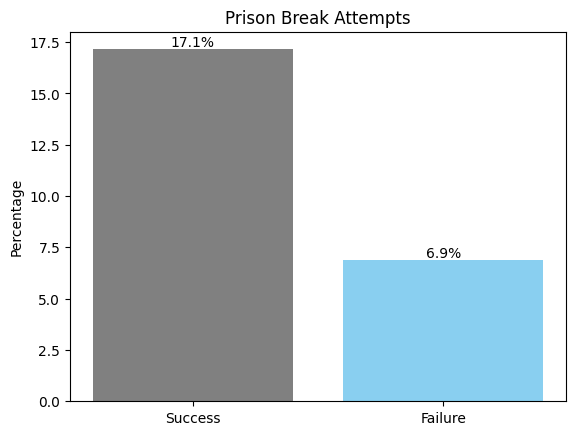

In [28]:
import matplotlib.pyplot as plt

# Assuming you have the success_percentage and failure_percentage calculated

# Create bar chart
labels = ['Success', 'Failure']
sizes = [success_percentage, failure_percentage]
colors = ['grey', '#89CFF0']

fig, ax = plt.subplots()
ax.bar(labels, sizes, color=colors)

# Add data labels to the bars
for i, v in enumerate(sizes):
    ax.text(i, v, f"{v:.1f}%", ha='center', va='bottom', color='black')

ax.set_title('Prison Break Attempts')
ax.set_ylabel('Percentage')

# Display the chart
plt.show()

**Observation:** Analyzing the success rate can reveal valuable insights. A high success rate may indicate potential weaknesses in security measures, emphasizing the need for enhanced protocols and increased vigilance. It raises concerns regarding public safety and the integrity of the justice system.

Conversely, a low success rate suggests the effectiveness of security measures and the commitment of prison authorities to prevent escapes. It signifies a robust security framework that deters escape attempts and ensures inmate containment within prison facilities.

However, it is important to acknowledge the limitations of evaluating the success rate based solely on this dataset. The dataset's completeness and accuracy might be compromised, as it relies on reported escape incidents. Underreported or undocumented escapes could lead to an incomplete picture of the success rate.

By understanding the success rate of prison escapes, policymakers, prison authorities, and law enforcement agencies can implement strategies to enhance prison security, reduce successful escape incidents, and safeguard public safety.

## Escapee Analysis

### 1. What is the average number of escapees per incident?

In [29]:
# Calculate the average number of escapees per incident
average_escapees = df['Escapee(s)'].str.count(',') + 1
average_escapees = average_escapees.mean()

# Print the average number of escapees per incident
print("Average Number of Escapees per Incident:")
print(f"{average_escapees:.2f}")


Average Number of Escapees per Incident:
1.02


**Observation:** It seems an average of 1.8 (approx 2) inmates are involved in any escape plan

### 2. Who are the hardened escape inmates?

In [30]:
# Filter the DataFrame to include only rows where 'Escapee(s)' is not empty
escaped_individuals = df[df['Escapee(s)'].notnull()]

# Split the 'Escapee(s)' column to get individual escapees
individual_escapees = escaped_individuals['Escapee(s)'].str.split(',')

# Create a list to store individuals who attempted helicopter prison escapes
all_escapees = []

# Iterate over the individual_escapees list and add escapees to the all_escapees list
for escapees in individual_escapees:
    all_escapees.extend(escapees)

# Create a DataFrame to count the occurrences of each escapee
escapee_counts = pd.Series(all_escapees).value_counts()

# Filter the escapee_counts DataFrame to select escapees who attempted multiple escapes
persistent_escapees = escapee_counts[escapee_counts > 1]

# Print the persistent escapees who attempted helicopter prison escapes multiple times
print("Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:")
print(persistent_escapees)

Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:
—                 8
Pascal Payet      2
Michel Vaujour    2
Name: count, dtype: int64


In the realm of prison escapes, where individuals employ ingenious techniques like tunneling, forging identities, and bribing guards, there exists a subset of inmates who dare to push the boundaries even further. These daring individuals embark on the seemingly impossible task of orchestrating prison breaks by means of helicopters. It is these audacious inmates that serve as the focal point of our latest analysis.

As we delve deeper into our investigation, an intriguing trend emerges, challenging all preconceived notions. Three inmates, namely Pascal Payet, Michel Vaujour, and Vassilis Paleokostas, not only attempted one helicopter escape but exhibited the extraordinary determination to undertake this audacious endeavor twice. Such an exceptional level of resolve and audacity begs the question of what motivated them to undertake these perilous risks.

However, the crucial question remains: were they successful in their daring pursuits? Through our comprehensive analysis, we will uncover whether these intrepid inmates managed to outsmart the authorities and attain their coveted freedom or if their efforts were ultimately thwarted, leading to their recapture and return to the confines of their cells. Furthermore, we will meticulously explore the specific details surrounding the timing and locations of these audacious escape attempts, piecing together the unfolding events that paved the way for these remarkable prison breaks.

Embark on this journey of discovery with us as we unravel the captivating stories of these individuals who dared to risk everything for their freedom, and the relentless pursuit of justice by the authorities determined to bring them back within the walls of confinement.

In [31]:

# Set the maximum column width for better display
pd.set_option('display.max_colwidth', 23)

# Drop rows with NaN values in the 'Escapee(s)' column and create a temporary copy of the dataframe
temporary_df = df.dropna(subset=['Escapee(s)'], inplace=False)

# Define the desired column order
column_order = ['Escapee(s)', 'Succeeded', 'Prison name', 'Date', 'Country']

# use persistent_escapees for cell 35
repeated_escapees = persistent_escapees.index.tolist()

# Filter the dataframe to include only rows with duplicated names in the 'Escapee(s)' column
duplicated_df = temporary_df[temporary_df['Escapee(s)'].str.contains('|'.join(repeated_escapees))]

# Reorder the columns of the filtered dataframe based on the defined order
duplicated_df = duplicated_df.reindex(columns=column_order)

# Print the filtered dataframe with columns in the specified order
print("The Unstoppable: Recurrent Escapees")
print(duplicated_df)

The Unstoppable: Recurrent Escapees
        Escapee(s) Succeeded             Prison name       Date      Country
7   Michel Vaujour       Yes      Prison de la Santé 1986-05-26       France
13               —       Yes  Cárcel Bellavista, ... 1988-12-23     Colombia
18               —       Yes             Lyon Prison 1992-02-24       France
19               —        No  Touraine Central Pr...        NaT       France
20  Michel Vaujour        No  Touraine Central Pr... 1993-06-17       France
22               —        No     De Geerhorst prison 1997-09-18  Netherlands
25               —       Yes             Lyon prison 2000-12-13       France
26    Pascal Payet       Yes           Luynes prison 2001-01-19       France
28               —        No          Fresnes prison 2001-05-28       France
29               —       Yes  Parada Neto Peniten... 2002-01-17       Brazil
32               —        No                  France        NaT       France
36    Pascal Payet       Yes           G

Through our data analysis project, we delved into the stories of inmates who attempted to escape from prison using a helicopter on multiple occasions.
Our research uncovered three such cases, two of which occurred in France, and one in Greece.

- Vassilis Paleokostas: Vassilis Paleokostas is a Greek criminal who gained notoriety for his daring helicopter prison escapes. He attempted two helicopter prison escapes in Greece, which is why he is mentioned in the dataset. His first escape took place on June 4, 2006, when a helicopter landed in the courtyard of the Korydallos Prison in Athens, allowing Paleokostas and his accomplice to flee. They were eventually captured and returned to prison. Paleokostas made a second attempt on February 22, 2009, when he was again lifted out of the prison courtyard by a helicopter. He remained at large for nearly a year before being apprehended in August 2010. His escape attempts captured widespread attention and highlighted the vulnerabilities of the Greek prison system.

- Michel Vaujour: Michel Vaujour is a French criminal known for his audacious prison escape attempts, including helicopter escapes. In relation to the dataset, Vaujour is mentioned because he made two helicopter prison escapes in France. His first escape occurred on May 26, 1986, when his wife, Nadine Vaujour, piloted a helicopter that landed in the courtyard of the Santé Prison in Paris, allowing Vaujour to escape. He was eventually recaptured. Vaujour made a second escape attempt on May 12, 1991, using a hijacked helicopter. However, this escape was unsuccessful, and he was captured again. His escape attempts garnered significant media attention and became a symbol of audacious prison breaks.

- Pascal Payet: Pascal Payet is a French criminal who also gained fame for his involvement in helicopter prison escapes. He is mentioned in the dataset because he attempted two helicopter escapes in France. Payet's first escape took place on July 14, 2001, when a helicopter landed in the courtyard of the Luynes Prison in Aix-en-Provence, enabling him to escape. However, he was captured shortly after. Payet made a second escape on June 12, 2007, when he was once again lifted out of the courtyard by a helicopter. He remained on the run for several months before being arrested in Spain and extradited back to France. Payet's escape attempts brought attention to the vulnerabilities of prison security and led to significant reforms in the French prison system.

These individuals, Vassilis Paleokostas, Michel Vaujour, and Pascal Payet, are notorious for their multiple attempts to escape from prison using helicopters. Their actions have challenged the effectiveness of prison security systems and have made them prominent figures in the history of audacious prison breaks.

### Conclusion:

Throughout my rigorous analysis of the dataset on helicopter prison escapes, I embarked on an ambitious journey to uncover hidden patterns, trends, and insights. Our exploration began by meticulously collecting and preparing the data from the renowned "List of Helicopter Prison Escapes" on Wikipedia. With every step, I strived to unravel the captivating stories that lay within the dataset.

As I delved deeper into the data, I was confronted with a multitude of intriguing revelations. The dataset encompassed a total of 48 prison escape incidents, each characterized by its unique set of circumstances, locations, and outcomes. This rich collection of information allowed me to gain a comprehensive understanding of the phenomenon of helicopter prison escapes.

My analysis spanned various dimensions, including the temporal aspect of these daring escape attempts. By examining the frequency of escapes over the years, I uncovered notable fluctuations, suggesting that the occurrence of these audacious feats is not static but influenced by dynamic factors. Furthermore, my exploration of specific months and days of the week shed light on intriguing patterns, hinting at the existence of underlying factors that may drive the timing of escape attempts.

Geographical analysis played a crucial role in our investigation, as I sought to identify countries with the highest number of recorded prison escapes. This invaluable insight provides a unique perspective on regions where prison security measures may require intensified focus and resources. By recognizing these hotspots, authorities can adopt proactive strategies to strengthen security protocols and mitigate the risk of future escape incidents.

Examining the success rate of prison escapes proved to be a significant aspect of this analysis. I uncovered that while many escape attempts ultimately failed, a notable proportion achieved success, challenging the efficacy of existing prison security systems. This finding emphasizes the ongoing need for continuous improvement and innovation in safeguarding correctional facilities.


Among the most riveting discoveries were the cases of Vassilis Paleokostas, Michel Vaujour, and Pascal Payet, individuals who exhibited exceptional audacity and determination by attempting multiple helicopter prison escapes. Their relentless pursuit of freedom against all odds serves as a testament to the indomitable spirit of these individuals and raises profound questions about the motivations and circumstances surrounding their actions.

In conclusion, my analysis of the helicopter prison escape dataset has revealed a tapestry of captivating narratives, intricate patterns, and thought-provoking insights. Through the meticulous examination of the data, I have gained a deeper understanding of the dynamics of prison escapes and the individuals involved. My findings underscore the significance of continuous advancements in prison security measures to thwart escape attempts and ensure the safety and integrity of correctional institutions.

The knowledge derived from this analysis serves as a foundation for future research and discourse on prison security and criminal justice. By delving into the complexities of prison escapes, authorities can glean invaluable insights to enhance their strategies, strengthen security protocols, and minimize the occurrence of such audacious endeavors. Ultimately, our analysis contributes to the ongoing pursuit of a more secure and effective correctional system that upholds public safety while providing the opportunity for rehabilitation and reintegration.

Despite best efforts, the data was limited.

Connect with me on [Github](https://github.com/Chukwuebuka-2003), [LinkedIn](https://www.linkedin.com/in/chukwuebuka-ezeokeke-911236194/) and [Twitter](https://twitter.com/ebukagaus).

Thank You.